In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [107]:
df = pd.read_csv('/content/drive/MyDrive/제로베이스/제로베이스 머신러닝 프로젝트/csv 폴더 모음/merged 데이터 20240122', index_col=0)
df.tail()

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,like,price,discount_rate,delivery_date,rating,review,buy,score
7748,스포츠/용품,아우터,나일론 아노락 자켓 - 블랙 / 2033B427-001,2033B427-001,0,1,0,0.0,"('24~28세', 0)",2100.0,1275,87200.0,20,4.0,4.9,222,300.0,0.987500
7749,아우터,패딩 베스트,라이트 덕다운 패딩 베스트 [브라운],TMPD512340BR,0,0,0,NaN,"('~18세', 0)",1200.0,112,187000.0,0,5.0,5.0,2,NaN,1.000000
7750,아우터,패딩 베스트,[MENS] 리버서블 패딩 조끼(10 color),HBA-VT-M201,0,0,0,0.0,"('34~39세', 0)",1400.0,198,38400.0,60,5.0,4.8,33,100.0,0.976190
7751,아우터,숏패딩/숏헤비 아우터,숏 미니멀 덕다운 패딩 블랙,3001,0,1,0,0.0,"('29~33세', 0)",3300.0,2028,238400.0,20,7.0,4.8,87,100.0,0.988095
7752,아우터,아노락 재킷,Pocket Tidy Hood Anorak H7 Navy/Green,409,1,0,2,1.0,"('34~39세', 0)",400.0,368,53000.0,40,5.0,5.0,22,50.0,0.947368


In [108]:
df.shape

(7753, 18)

In [109]:
# df = df.drop_duplicates()

In [110]:
df.isnull().sum()

major_category        0
middle_category       0
name                  0
number                0
limit                 0
exclusive             0
target_gender         0
buy_gender         2275
buy_age               0
view                388
like                  0
price                 0
discount_rate         0
delivery_date        11
rating              995
review                0
buy                2351
score               969
dtype: int64



---



## 상의-스포츠/용품 위치 바꾸기

In [111]:
df.loc[df.middle_category == '상의', 'major_category'] = '상의'

In [112]:
df.loc[df.middle_category == '상의','middle_category'] = '스포츠/용품'

In [113]:
df.loc[df.middle_category == '아우터', 'major_category'] = '아우터'
df.loc[df.middle_category == '아우터','middle_category'] = '스포츠/용품'

## 중복행 제거

In [114]:
df = df.drop_duplicates(keep='first', ignore_index=True)
df.tail()

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,like,price,discount_rate,delivery_date,rating,review,buy,score
7746,아우터,스포츠/용품,나일론 아노락 자켓 - 블랙 / 2033B427-001,2033B427-001,0,1,0,0.0,"('24~28세', 0)",2100.0,1275,87200.0,20,4.0,4.9,222,300.0,0.987500
7747,아우터,패딩 베스트,라이트 덕다운 패딩 베스트 [브라운],TMPD512340BR,0,0,0,NaN,"('~18세', 0)",1200.0,112,187000.0,0,5.0,5.0,2,NaN,1.000000
7748,아우터,패딩 베스트,[MENS] 리버서블 패딩 조끼(10 color),HBA-VT-M201,0,0,0,0.0,"('34~39세', 0)",1400.0,198,38400.0,60,5.0,4.8,33,100.0,0.976190
7749,아우터,숏패딩/숏헤비 아우터,숏 미니멀 덕다운 패딩 블랙,3001,0,1,0,0.0,"('29~33세', 0)",3300.0,2028,238400.0,20,7.0,4.8,87,100.0,0.988095
7750,아우터,아노락 재킷,Pocket Tidy Hood Anorak H7 Navy/Green,409,1,0,2,1.0,"('34~39세', 0)",400.0,368,53000.0,40,5.0,5.0,22,50.0,0.947368


In [115]:
df.isnull().sum()

major_category        0
middle_category       0
name                  0
number                0
limit                 0
exclusive             0
target_gender         0
buy_gender         2274
buy_age               0
view                388
like                  0
price                 0
discount_rate         0
delivery_date        11
rating              995
review                0
buy                2350
score               969
dtype: int64

## Null값 처리

### buy의 Null값 처리
- 평점이 0, 조회수가 0이어도, 조회수가 200 이하인 상품은 buy가 NaN이어도 유지함
- 정말 안 팔려서 NaN으로 수집된 아이템으로 고려
- 그 외 NaN값은 drop

-> 처리 결과 20개 정도만 남음

In [116]:
bool1 = df.rating.isnull()
bool2 = df.review == 0
bool3 = df.view < 200
bool4 = df.buy.isnull()
df.loc[(bool1 & bool2)&  bool3 &bool4, 'buy'] = 0

In [117]:
df.dropna(subset=['buy'], inplace=True)

In [118]:
df.isnull().sum()

major_category      0
middle_category     0
name                0
number              0
limit               0
exclusive           0
target_gender       0
buy_gender         63
buy_age             0
view                5
like                0
price               0
discount_rate       0
delivery_date       4
rating             91
review              0
buy                 0
score              83
dtype: int64

### buy_gender Null값 처리
- target_gender값과 동일하게 입력

In [119]:
df.loc[df['buy_gender'].isnull() == True, 'buy_gender'] = df.loc[df['buy_gender'].isnull() == True, 'target_gender']

### 나머지 결측값 처리를 위해 데이터 통계량 확인

In [120]:
df.describe()

,limit,exclusive,target_gender,buy_gender,view,like,price,discount_rate,delivery_date,rating,review,buy,score
count,5464.000000,5464.000000,5464.000000,5464.000000,5459.000000,5464.000000,5.464000e+03,5464.000000,5460.000000,5373.000000,5464.000000,5464.000000,5381.000000
mean,0.257321,0.048865,0.784773,0.420205,5888.184649,4090.022877,8.635078e+04,29.480234,5.613736,4.800484,606.032394,1174.798682,0.969538
std,0.437198,0.215606,0.825293,0.496595,17050.635972,11808.298724,9.016765e+04,21.833912,2.766361,0.187410,3463.744067,5905.904890,0.046017
min,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000e+00,0.000000,3.000000,2.300000,0.000000,0.000000,0.375000
25%,0.000000,0.000000,0.000000,0.000000,1400.000000,409.750000,3.890000e+04,10.000000,5.000000,4.700000,16.000000,50.000000,0.955882
50%,0.000000,0.000000,1.000000,0.000000,2400.000000,1028.500000,5.940000e+04,30.000000,5.000000,4.800000,44.000000,100.000000,0.983146
75%,1.000000,0.000000,2.000000,1.000000,4400.000000,2733.750000,1.042500e+05,44.000000,6.000000,4.900000,178.250000,450.000000,1.000000
max,1.000000,1.000000,2.000000,2.000000,560000.000000,243639.000000,2.450000e+06,90.000000,60.000000,5.000000,107179.000000,189000.000000,1.000000


### delivery_date Null값 처리
- max값을 보아 이상치가 있는 것을 확인, 중앙값인 5일로 입력

In [121]:
df.loc[df['delivery_date'].isnull() == True, 'delivery_date'] = 5.0

### rating의 Null값 처리

In [122]:
notzerobuy_df = df.loc[(df['buy'] != 0) & (df['rating'].isnull())]
notzerobuy_df

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,like,price,discount_rate,delivery_date,rating,review,buy,score
138,상의,후드 티셔츠,메테오샤워 후드 오트밀 MJHD7698,5004339106,0,0,0,1.0,"('19~23세', 0)",2300.0,442,43900.0,26,5.0,NaN,0,50.0,NaN
174,상의,니트/스웨터,하프 집업 오버핏 케이블 니트 - 6 COLOR,JT68,0,0,2,0.0,"('29~33세', 0)",5700.0,254,34800.0,78,6.0,NaN,0,50.0,NaN
803,상의,긴소매 티셔츠,울U넥 티,78,0,0,1,1.0,"('29~33세', 0)",150.0,92,48000.0,0,5.0,NaN,0,50.0,NaN
1144,바지,트레이닝/조거 팬츠,JORDAN PIGMENT TRACKSUIT PANTS (WHITE),GY23CPT002WH,0,0,1,1.0,"('24~28세', 0)",2100.0,394,108000.0,0,5.0,NaN,0,50.0,NaN
1248,바지,기타 바지,[기모] 나일론 스트링 카고 팬츠 그레이,PY-23176 GY,1,0,0,0.0,"('29~33세', 0)",2000.0,320,31200.0,50,5.0,NaN,0,50.0,NaN
1681,상의,맨투맨/스웨트셔츠,CROP SWEAT BOLERO WHITE MELANGE,CA22DCD001WM,0,0,1,1.0,"('19~23세', 0)",1200.0,2773,42500.0,35,21.0,NaN,115,350.0,0.973684
1682,상의,니트/스웨터,Pakrat Wool Knit Pullover Oatmeal,MDKNDC001OT,1,0,0,1.0,"('19~23세', 0)",2000.0,397,63200.0,20,5.0,NaN,0,50.0,NaN
1754,상의,맨투맨/스웨트셔츠,[세트] 돌핀 자수 엣지 기모 스웻셔츠 조거 트레이닝 팬츠 블랙,134322722BK,0,0,0,1.0,"('40세~', 0)",1400.0,117,79900.0,53,5.0,NaN,0,50.0,NaN
1849,상의,후드 티셔츠,HOME PAINTING PRINTED HOODIE (WHITE),11698,0,0,2,1.0,"('24~28세', 0)",3900.0,616,132300.0,10,7.0,NaN,0,50.0,NaN
1850,상의,맨투맨/스웨트셔츠,UNISEX DUNST LOGO CREASE SWEATSHIRT FRENCH NAV...,UDTS4A103N2,0,0,1,1.0,"('24~28세', 0)",950.0,1683,65550.0,5,7.0,NaN,110,300.0,1.000000


In [123]:
notzerobuy_df.isnull().sum()

major_category      0
middle_category     0
name                0
number              0
limit               0
exclusive           0
target_gender       0
buy_gender          0
buy_age             0
view                0
like                0
price               0
discount_rate       0
delivery_date       0
rating             28
review              0
buy                 0
score              18
dtype: int64

### rating의 Null값 처리
  - buy값이 0이 아니면서 rating이 0인 22개 -> 4.8
  - buy값이 0이면서 rating이 0인 27개 -> 0

In [124]:
df.loc[df['rating'].isnull() == True, 'rating'] = 0.0

for i in notzerobuy_df.index:
  df.loc[i, 'rating'] = 4.8

In [125]:
df.shape

(5464, 18)

### score의 Null값 처리

In [129]:
average_score = df['score'].mean()
df['score'] = df['score'].fillna(average_score)
df.isnull().sum()

major_category     0
middle_category    0
name               0
number             0
limit              0
exclusive          0
target_gender      0
buy_gender         0
buy_age            0
view               5
like               0
price              0
discount_rate      0
delivery_date      0
rating             0
review             0
buy                0
score              0
dtype: int64

### view의 Null값 처리
- RandomForestRegressor 모델을 이용한 예측값 사용
- 여러가지 파라미터 조정 결과
  - Best r2_Score: 0.47624328080184863
  - Best trial parameter {'n_estimators': 281, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.8499303073699949}

In [130]:
# 아래 이상치 발견에 따라 위에서 추가로 전처리를 진행해주었음
df.loc[df.review == 81354, :] = 100000
df = df[df.review < df.buy]
df[df.review >= df.buy]

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,like,price,discount_rate,delivery_date,rating,review,buy,score


In [131]:
df.shape

(4931, 18)

In [132]:
df.isnull().sum()

major_category     0
middle_category    0
name               0
number             0
limit              0
exclusive          0
target_gender      0
buy_gender         0
buy_age            0
view               5
like               0
price              0
discount_rate      0
delivery_date      0
rating             0
review             0
buy                0
score              0
dtype: int64

In [ ]:
df.shape

(4931, 17)

In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

# DataFrame에서 'view'가 결측치인 행을 제외한 데이터로 모델을 학습시키기 위해 두 개의 서브셋을 생성
train_data = df.dropna(subset=['view'])
predict_data = df[df['view'].isnull()]

# 특성과 타겟을 정의
features = ['score', 'like', 'review', 'price', 'discount_rate', 'rating','delivery_date', 'exclusive', 'limit', 'buy', 'buy_gender', 'target_gender']
target = 'view'

# 학습 데이터셋과 타겟을 설정
X = train_data[features]
y = train_data[target]

#train, test 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

params = {'n_estimators': 281, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.8499303073699949}
model = RandomForestRegressor(**params)

# 학습 데이터셋을 이용하여 모델을 학습
model.fit(X_train, y_train)

# 예측 데이터셋을 이용하여 'view'의 결측치를 예측
predicted_views = model.predict(X_test)

r2_score(y_test, predicted_views)

0.4433412897353296

In [69]:
df.isnull().sum()

major_category     0
middle_category    0
name               0
number             0
limit              0
exclusive          0
target_gender      0
buy_gender         0
buy_age            0
view               5
like               0
price              0
discount_rate      0
delivery_date      0
rating             0
review             0
buy                0
dtype: int64

In [134]:
pred = model.predict(df.loc[df.view.isnull(), ['score', 'like', 'review', 'price', 'discount_rate', 'rating','delivery_date', 'exclusive', 'limit', 'buy', 'buy_gender', 'target_gender']])
df.loc[df['view'].isnull(), 'view'] = pred

In [135]:
df.isnull().sum()

major_category     0
middle_category    0
name               0
number             0
limit              0
exclusive          0
target_gender      0
buy_gender         0
buy_age            0
view               0
like               0
price              0
discount_rate      0
delivery_date      0
rating             0
review             0
buy                0
score              0
dtype: int64

## buy_age 변경
- 동률인 경우가 있기 때문에 buy_age1, buy_age2로 컬럼을 나눔
- 범위를 0,1,2,3,4,5,6으로 구분지어주었음

In [136]:
df.buy_age.unique()
# 1. ~18
# 2. 19~23
# 3. 24~28
# 5. 29~33
# 6. 34~39
# 7. 40~

array(["('29~33세', 0)", "('19~23세', 0)", "('40세~', 0)", "('24~28세', 0)",
       "('19~23세', '24~28세')", "('~18세', 0)", "('34~39세', 0)",
       "('24~28세', '40세~')", "('24~28세', '29~33세')",
       "('19~23세', '29~33세')", "('~18세', '19~23세')", '(0, 0)',
       "('~18세', '24~28세')", "('29~33세', '40세~')", "('34~39세', '40세~')",
       "('19~23세', '40세~')", "('29~33세', '34~39세')", "('~18세', '29~33세')",
       "('~18세', '40세~')", "('24~28세', '34~39세')", "('19~23세', '34~39세')"],
      dtype=object)

In [137]:
import re
numbers = [int(num) for num in re.findall(r'\d+', df.iloc[0, 8])]
numbers

[29, 33, 0]

In [138]:
def age1(row):
  numbers = [int(num) for num in re.findall(r'\d+', row)]
  return numbers[0]

In [139]:
df['buy_age1'] = df['buy_age'].apply(age1)

In [140]:
def age2(row):
  numbers = [int(num) for num in re.findall(r'\d+', row)]
  return numbers[1]

In [141]:
df['buy_age2'] = df['buy_age'].apply(age2)

In [142]:
df.buy_age1.unique()

array([29, 19, 40, 24, 18, 34,  0])

In [143]:
def age_range(row):
  if row == 40:
    return 6
  elif row == 18:
    return 1
  elif row == 19:
    return 2
  elif row == 24:
    return 3
  elif row == 29:
    return 4
  elif row == 34:
    return 5
  else: return 0

In [144]:
df['buy_age1'] = df['buy_age1'].apply(age_range)
df['buy_age2'] = df['buy_age2'].apply(age_range)

In [145]:
df

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,like,price,discount_rate,delivery_date,rating,review,buy,score,buy_age1,buy_age2
0,상의,셔츠/블라우스,오버사이즈 16골 에센셜 코듀로이 셔츠 블랙,22FWGS28BK,1,0,2,0.0,"('29~33세', 0)",1200.0,493,39800.0,20,19.0,4.6,36,50.0,0.976190,4,0
1,상의,니트/스웨터,TD5-SW01 램스울 라운드 니트-만다린오렌지,TD5-SW01_MAO,1,0,0,0.0,"('29~33세', 0)",4900.0,650,53550.0,10,5.0,4.9,61,200.0,0.954545,4,0
2,상의,후드 티셔츠,[SET UP] PPP 플라워 후드 셋업_멜란지 그레이,KBCS1TH003MGKBCS1PL003MGKBCS1PS003MG,1,0,2,1.0,"('19~23세', 0)",3600.0,2536,49900.0,49,5.0,4.8,41,150.0,1.000000,2,0
3,상의,후드 티셔츠,TIE DYE 후드티 Olive Green,CTTZPHD01UG4,0,0,0,0.0,"('40세~', 0)",1000.0,569,19800.0,80,5.0,4.8,62,150.0,0.971429,6,0
4,상의,긴소매 티셔츠,essential turtleneck logo top - pink,BT23WTS002PIKF,1,0,1,1.0,"('24~28세', 0)",11000.0,2561,43000.0,0,28.0,4.8,34,100.0,0.964286,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7744,아우터,숏패딩/숏헤비 아우터,다운 숏 푸퍼-블랙,P22FWOT001,0,0,2,0.0,"('19~23세', 0)",2900.0,771,139000.0,43,5.0,4.9,17,50.0,0.964286,2,0
7746,아우터,스포츠/용품,나일론 아노락 자켓 - 블랙 / 2033B427-001,2033B427-001,0,1,0,0.0,"('24~28세', 0)",2100.0,1275,87200.0,20,4.0,4.9,222,300.0,0.987500,3,0
7748,아우터,패딩 베스트,[MENS] 리버서블 패딩 조끼(10 color),HBA-VT-M201,0,0,0,0.0,"('34~39세', 0)",1400.0,198,38400.0,60,5.0,4.8,33,100.0,0.976190,5,0
7749,아우터,숏패딩/숏헤비 아우터,숏 미니멀 덕다운 패딩 블랙,3001,0,1,0,0.0,"('29~33세', 0)",3300.0,2028,238400.0,20,7.0,4.8,87,100.0,0.988095,4,0


In [148]:
df.reset_index(drop=True, inplace=True)

In [149]:
df.to_csv('/content/drive/MyDrive/제로베이스/제로베이스 머신러닝 프로젝트/무신사 리뷰 merge/무신사_리뷰merge_전처리완료240122.csv')

---

## EDA

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline
# import platform
# from matplotlib import font_manager, rc
# import numpy as np

# path = 'c:/Windows/Fonts/malgun.ttf'

# if platform.system() == 'Darwin':
#     rc('font', family = 'AppleGothic')
# elif platform.system() == 'Windows':
#     font_name = font_manager.FontProperties(fname = path).get_name()
#     rc('font', family = font_name)
# else:
#     print('Unlown system...sorry..')

## 데이터 분포도 확인

In [ ]:
df_corr = df[['limit', 'exclusive', 'target_gender', 'view',
              'like', 'price', 'discount_rate',
              'delivery_date', 'rating', 'review', 'buy']]

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(y=df_corr['view'], name='view'))
fig.add_trace(go.Box(y=df_corr['like'], name='like'))
fig.add_trace(go.Box(y=df_corr['discount_rate'], name='discount_rate'))
fig.add_trace(go.Box(y=df_corr['delivery_date'], name='delivery_date'))
fig.add_trace(go.Box(y=df_corr['rating'], name='rating'))
fig.add_trace(go.Box(y=df_corr['review'], name='review'))
fig.add_trace(go.Box(y=df_corr['buy'], name='buy'))

fig.show()

- 데이터가 편중되어 있지만 로그 변환과 같은 전처리가 필요해 보인다

## 상관관계 분석

In [ ]:
df_corr.corr()

,limit,exclusive,target_gender,view,like,price,discount_rate,delivery_date,rating,review,buy
limit,1.000000,-0.127689,0.109180,0.086535,0.131667,-0.014205,-0.020021,0.040493,0.044646,0.055197,0.061756
exclusive,-0.127689,1.000000,-0.019459,0.014154,0.012968,-0.065805,-0.019881,-0.026007,0.020039,0.038881,0.047586
target_gender,0.109180,-0.019459,1.000000,0.130249,0.153123,-0.110170,0.037804,0.071002,-0.044324,0.059334,0.077322
view,0.086535,0.014154,0.130249,1.000000,0.623520,-0.047969,0.030000,0.083638,0.011678,0.497281,0.562297
like,0.131667,0.012968,0.153123,0.623520,1.000000,-0.094162,-0.047724,0.067048,0.018465,0.826153,0.814722
price,-0.014205,-0.065805,-0.110170,-0.047969,-0.094162,1.000000,-0.303648,-0.036070,0.103752,-0.061419,-0.085216
discount_rate,-0.020021,-0.019881,0.037804,0.030000,-0.047724,-0.303648,1.000000,-0.047893,-0.163320,-0.028582,-0.025925
delivery_date,0.040493,-0.026007,0.071002,0.083638,0.067048,-0.036070,-0.047893,1.000000,-0.016861,0.017573,0.031156
rating,0.044646,0.020039,-0.044324,0.011678,0.018465,0.103752,-0.163320,-0.016861,1.000000,0.023844,0.027764
review,0.055197,0.038881,0.059334,0.497281,0.826153,-0.061419,-0.028582,0.017573,0.023844,1.000000,0.890346


In [ ]:
df.describe()

,limit,exclusive,target_gender,buy_gender,view,like,price,discount_rate,delivery_date,rating,review,buy,buy_age1,buy_age2
count,4931.000000,4931.000000,4931.000000,4931.000000,4926.000000,4931.000000,4.931000e+03,4931.000000,4931.000000,4931.000000,4931.000000,4931.000000,4931.000000,4931.000000
mean,0.251673,0.046238,0.805313,0.433178,6089.271214,3687.145812,8.432014e+04,29.917867,5.622186,4.800852,434.626242,1195.396471,3.176435,0.006287
std,0.434018,0.210022,0.824461,0.495565,17651.101405,10895.718811,8.790668e+04,21.873997,2.780004,0.193062,2953.986598,6143.581150,1.389507,0.144406
min,0.000000,0.000000,0.000000,0.000000,100.000000,15.000000,0.000000e+00,0.000000,3.000000,2.300000,0.000000,50.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1400.000000,399.000000,3.890000e+04,10.000000,5.000000,4.800000,15.000000,50.000000,2.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,2400.000000,945.000000,5.900000e+04,30.000000,5.000000,4.800000,37.000000,100.000000,3.000000,0.000000
75%,1.000000,0.000000,2.000000,1.000000,4500.000000,2455.500000,9.950000e+04,45.000000,6.000000,4.900000,136.500000,450.000000,4.000000,0.000000
max,1.000000,1.000000,2.000000,1.000000,560000.000000,243639.000000,2.450000e+06,90.000000,60.000000,5.000000,107179.000000,189000.000000,6.000000,6.000000


min값과 max값의 차이가 큰 값들이 많고 편차가 클 거 같다

<Axes: >

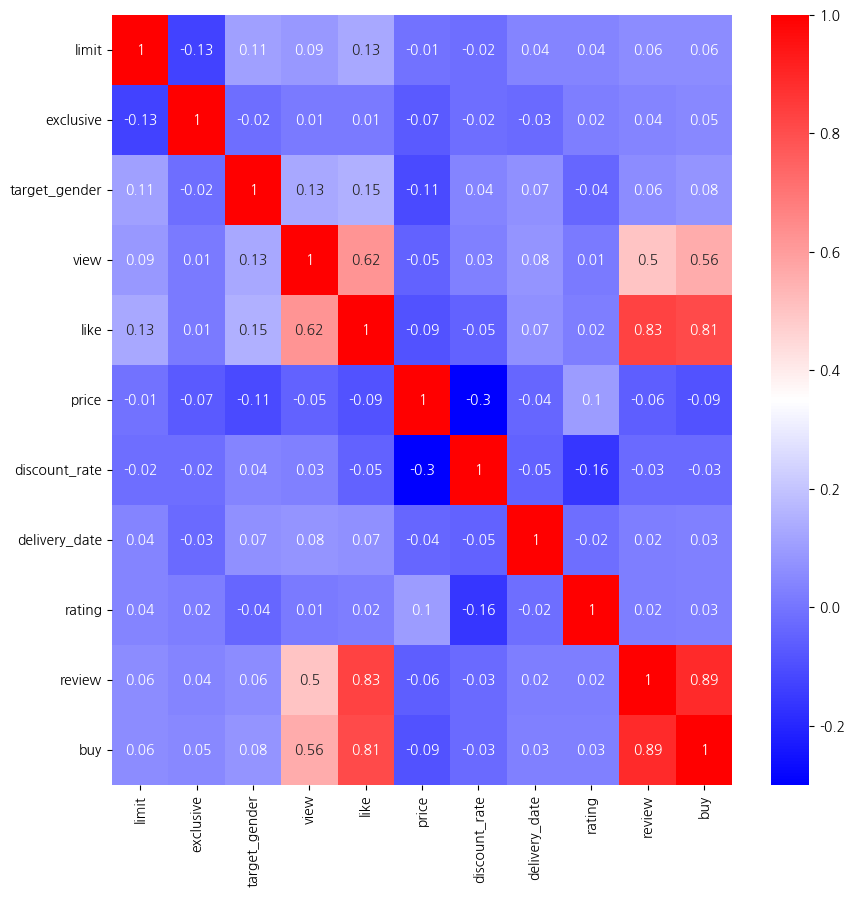

In [ ]:
plt.figure(figsize=(10, 10))
correlation_matrix = df_corr.corr(numeric_only=True).round(2)
sns.heatmap(data = correlation_matrix, annot=True, cmap='bwr')

- 예측하고자 한 누적 매출량과 관계성이 있는 항목은 조회수, 좋아요, 후기가 가장 높은 관계성을 가진다

## 한정판매 여부별 1년간 누적판매량

In [ ]:
import sys

# 모듈이 있는 디렉토리 경로
module_path = '/content/drive/MyDrive/제로베이스/koreanize_matplotlib'

# sys.path에 경로 추가
sys.path.append(module_path)

# 모듈 import
import koreanize_matplotlib

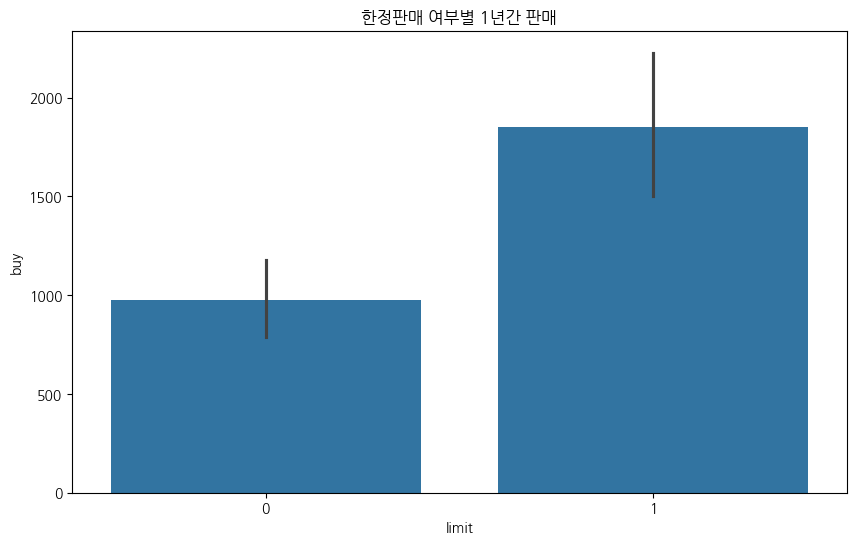

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="limit", y="buy", data=df)
plt.title("한정판매 여부별 1년간 판매")
plt.show()

# 한정판매 X = 0
# 무신사 한정판매 O = 1

- 한정판매가 아닌 경우보다 한정판매인 경우가 누적판매량의 평균이 2배가 차이가 난다

## 단독판매별 1년간 누적판매량

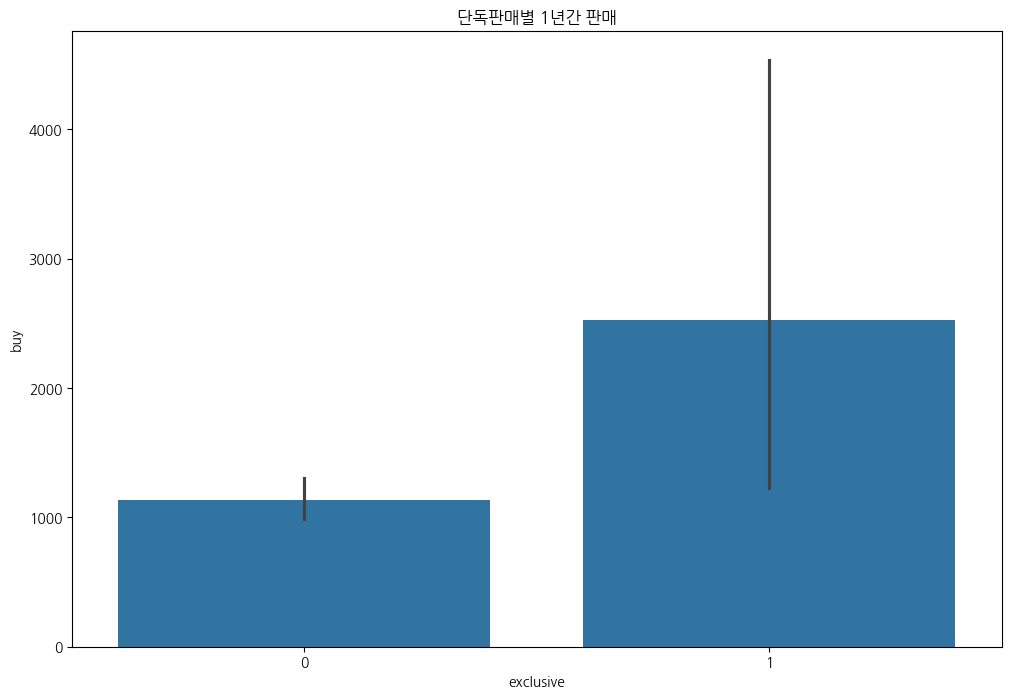

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x="exclusive", y="buy", data=df)
plt.title("단독판매별 1년간 판매")
plt.show()
# 무신사 단독판매 = 1
# 아니면 = 0

- 단독판매가 아닌 경우보다 단독판매인 경우가 누적판매량의 평균이 2배 이상 차이가 난다

## 타겟 성별별 1년간 판매

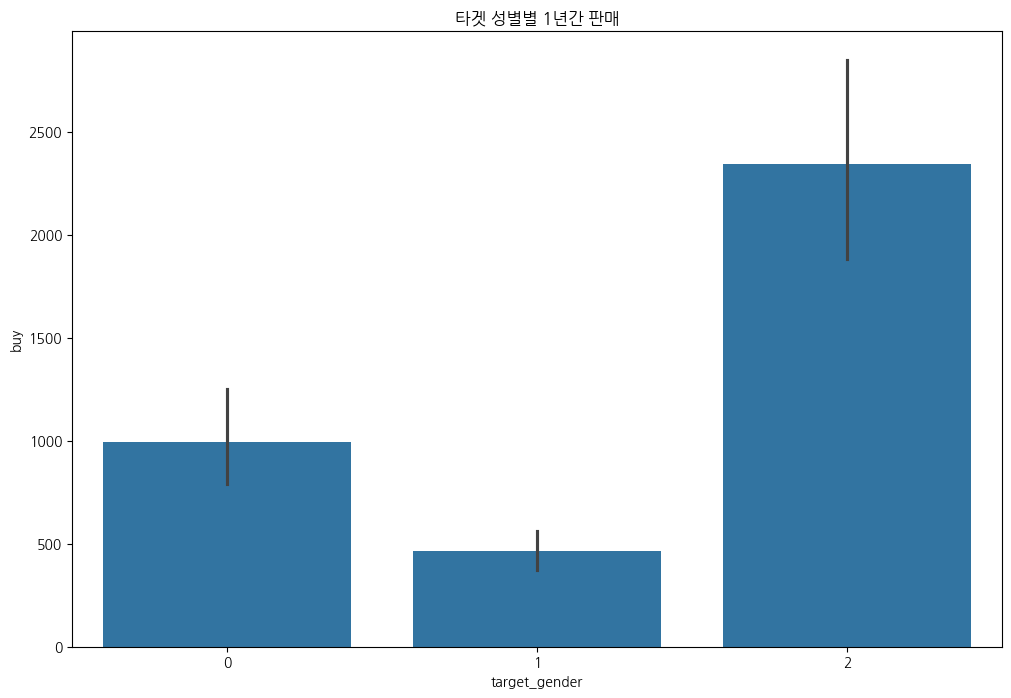

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x="target_gender", y="buy", data=df)
plt.title("타겟 성별별 1년간 판매")
plt.show()
# 남자 = 0
# 여자 = 1
# 남/여 = 2

- 타겟 성별별 누적매출량은 남녀공용 제품이 가장 높고 여성 제품이 가장 낮다

## 조회수에 따른 1년간 판매량 현황

In [ ]:
# import matplotlib as mpl

# plt.rc('font', size = 13)
# figure, ax = plt.subplots()
# figure.set_size_inches(11, 5)


# # 조회수에 따른 1년간 판매량 현황 막대그래프
# sns.barplot(x = 'view', y = 'buy', data = df)

# # 그래프 제목, x축 라벨, y축 라벨명 설정
# ax.set(title = '조회수에 따른 1년간 판매량 현황',
#        xlabel = '조회수',
#        ylabel = '1년간 막대그래프');

# plt.xticks(fontsize=5)
# plt.show();

## 평점별 1년간 판매량 현황 막대그래프

In [ ]:
selected_rows = df[df['like'] <= 120000]
selected_rows_view = selected_rows[selected_rows['view'] <= 150000]


In [ ]:
df['rating'].unique()

array([4.6, 4.9, 4.8, 5. , 4.7, 4.5, 4.3, 3.8, 4.4, 3.9, 2.3, 4.2, 4. ,
       4.1, 3. , 3.7, 3.6, 3.4, 2.8, 3.2, 3.5])

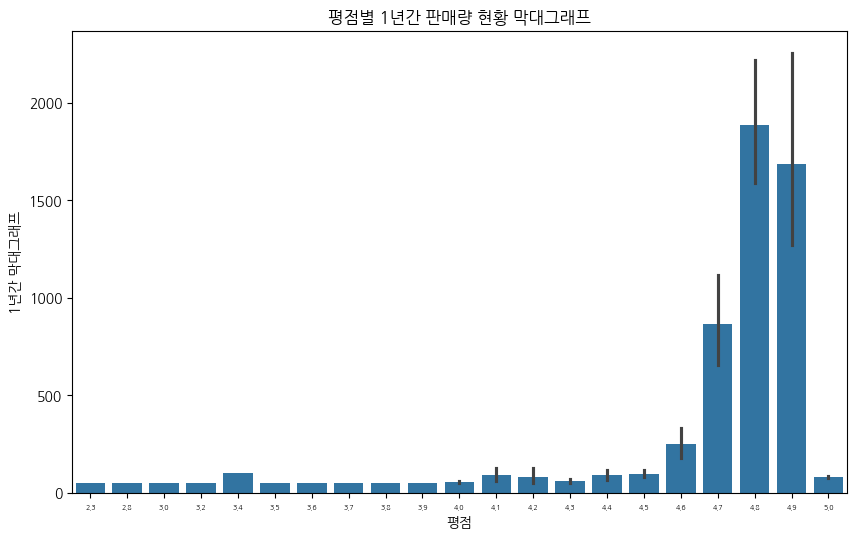

In [ ]:
# 평점별 1년간 판매량 현황 막대그래프
plt.figure(figsize=(10,6))
sns.barplot(x = 'rating', y = 'buy', data = df)
# sns.pointplot(x='rating', y='buy', data=selected_rows_view, join=False, markers='o')


# 그래프 제목, x축 라벨, y축 라벨명 설정
plt.title('평점별 1년간 판매량 현황 막대그래프')
plt.xlabel('평점')
plt.ylabel('1년간 막대그래프')

plt.xticks(fontsize=5)
plt.show();

다양한 평점을 받을 수록 5점이 아닐 확률이 높고
평점이 높은 제품일 수록 판매량이 높다(평점-판매량 상관관계가 높음)

## 카테고리 변수들의 분포 확인

In [ ]:
# sns.countplot(x='buy_age1', data=df)
# plt.title('Buy Age 분포')

# plt.show()
# sns.countplot(x='buy_age2', data=df)
# plt.title('Buy Age2 분포')

# plt.show()

buy_age2는 의미 없음을 확인하여 후에 제거를 진행

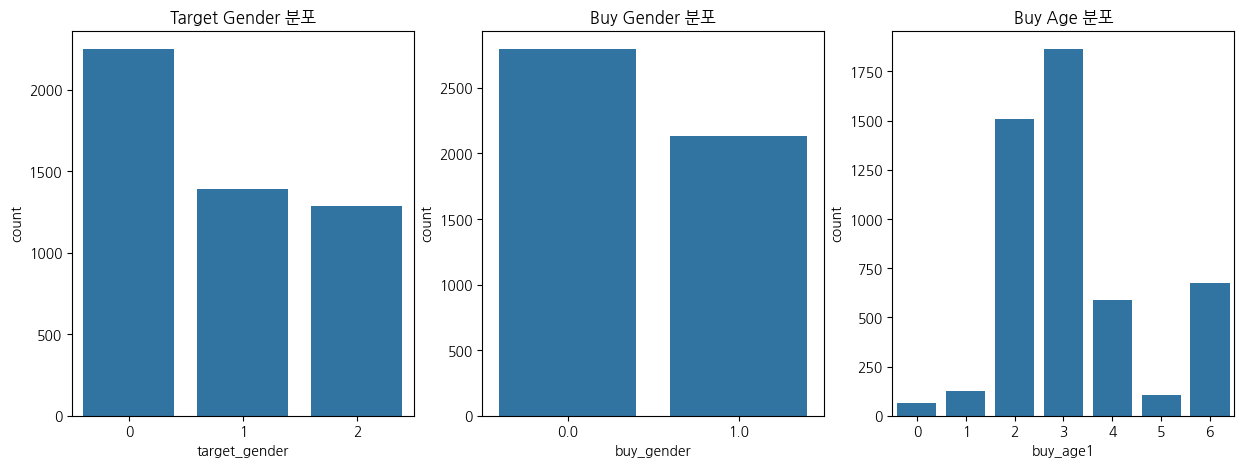

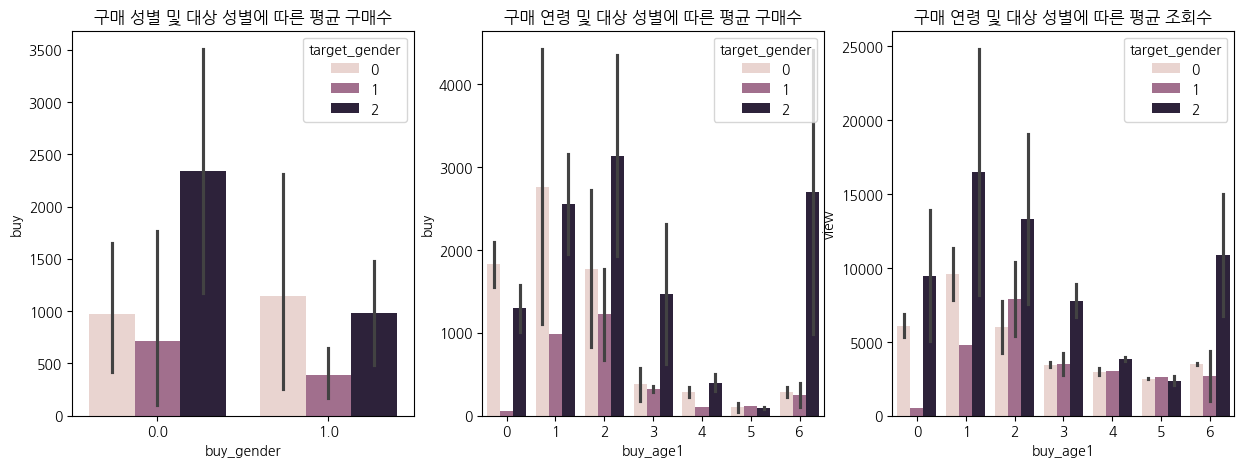

In [ ]:
# 카테고리 변수들의 분포 확인
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='target_gender', data=df)
plt.title('Target Gender 분포')

plt.subplot(1, 3, 2)
sns.countplot(x='buy_gender', data=df)
plt.title('Buy Gender 분포')

plt.subplot(1, 3, 3)
sns.countplot(x='buy_age1', data=df)
plt.title('Buy Age 분포')

plt.show()

# 각 카테고리에 따른 구매율, 조회수, 좋아요 등의 평균값 확인
grouped_data = df.groupby(['target_gender', 'buy_gender', 'buy_age1']).agg({
    'buy': 'mean',
    'view': 'mean',
    'like': 'mean'
}).reset_index()

# 시각화
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='buy_gender', y='buy', hue='target_gender', data=grouped_data)
plt.title('구매 성별 및 대상 성별에 따른 평균 구매수')

plt.subplot(1, 3, 2)
sns.barplot(x='buy_age1', y='buy', hue='target_gender', data=grouped_data)
plt.title('구매 연령 및 대상 성별에 따른 평균 구매수')

plt.subplot(1, 3, 3)
sns.barplot(x='buy_age1', y='view', hue='target_gender', data=grouped_data)
plt.title('구매 연령 및 대상 성별에 따른 평균 조회수')

plt.show()





(상의, 하의, 아우터 기준)

상품에 대한 그래프
1번 그래프
- 남성을 타겟으로 한 제품이 많음

2번 그래프
- 남성이 더 선호하는 제품이 여성이 더 선호하는 제품보다 많다.

3번 그래프
- 19세-28세 사이에 고객층에서 인기 있는 제품이 많음
- 40대 이상의 경우 미성년 고객이 부모님의 아이디를 사용했을 가능성이 존재
- 이 쇼핑몰의 제품들의 매력도가 20대 후반부터는 잘 어필할 수 없음
-------------
1년간 구매 수량에 대한 그래프

4번째 그래프
- 여성도 여성 겨냥 제품보다 남자 혹은 공용제품을 더 많이 구매함
- 남성은 남성 제품보다 공용 제품을 더 많이 구매함
- 남성이 여성 제품을 구매한 경우도 적지 않음
- 남, 여가 각자 많이 구매한 제품 중에는 남자/여자를 각 겨냥한 상품보다 남녀공용 상품이 비슷하거나 많았다.


5번째 그래프
- 20대 이상의 모든 연령층에서 공용 제품 판매량이 가장 많다.
- 10대에서는 남성 타겟 제품이 가장 많다
- 여성 타겟 제품은 비교적  판매량이 떨어진다.

6번쨰 그래프
- 여성들의 경우 조회를 더 많이 하는 것에 비해 구매 전환이 떨어지는 편이다
- 남성의 경우 조회수 대비 구매 전환율이 더 잘 된다.
- 구매량과 조회수는 비례한다.

## 누적판매량과 수치형 컬럼간의 선형 관계 확인

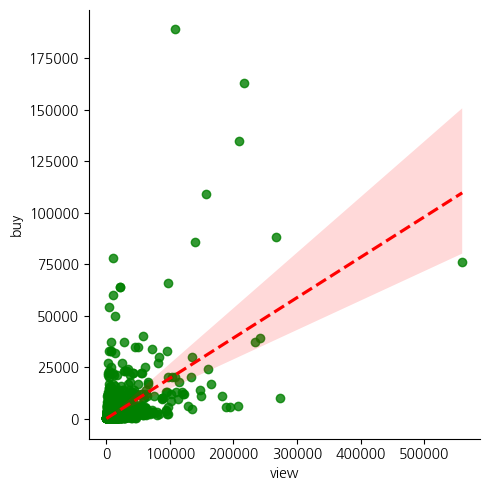

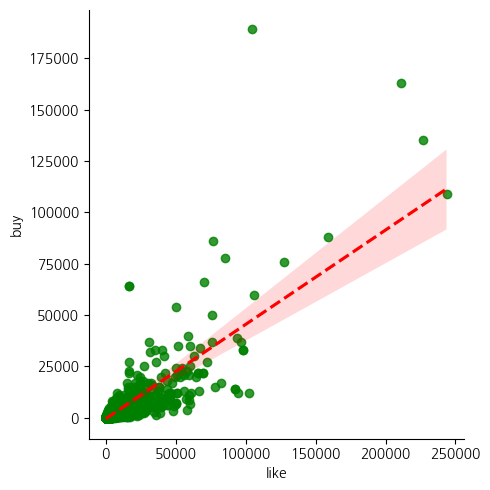

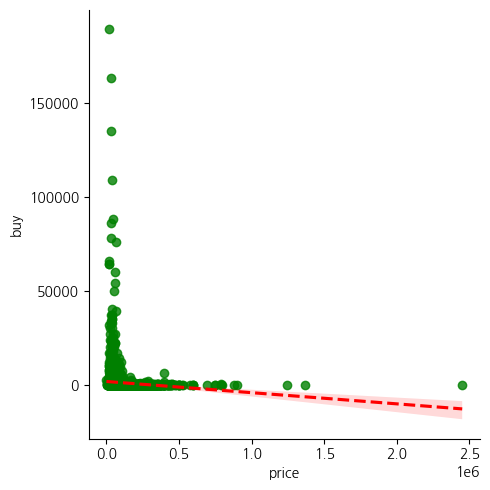

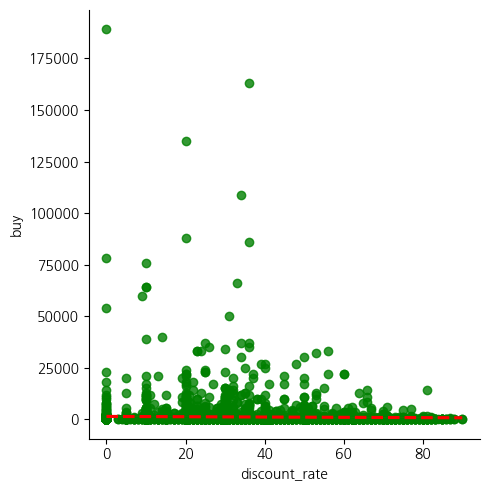

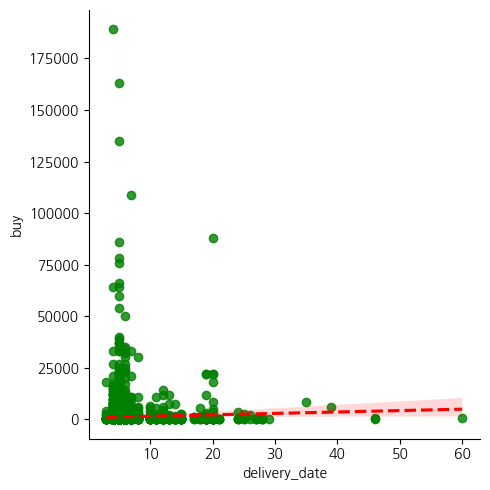

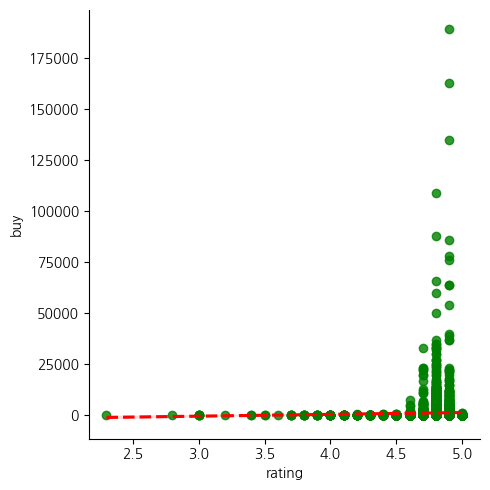

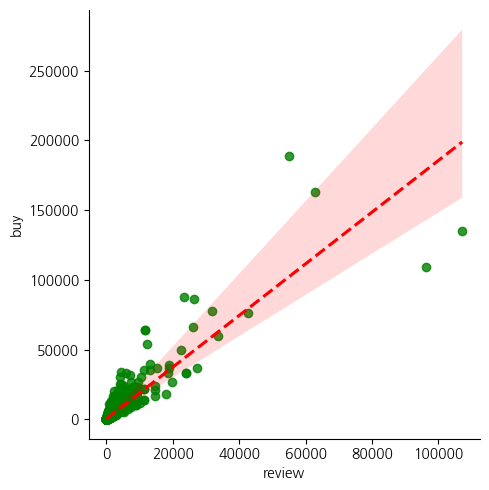

In [ ]:
sns.lmplot(x='view', y='buy', data=df,
           line_kws={'color':'red','linestyle':'--' },
           scatter_kws={'color':'green'})
sns.lmplot(x='like', y='buy', data=df,
           line_kws={'color':'red','linestyle':'--' },
           scatter_kws={'color':'green'})
sns.lmplot(x='price', y='buy', data=df,
           line_kws={'color':'red','linestyle':'--' },
           scatter_kws={'color':'green'})
sns.lmplot(x='discount_rate', y='buy', data=df,
           line_kws={'color':'red','linestyle':'--' },
           scatter_kws={'color':'green'})
sns.lmplot(x='delivery_date', y='buy', data=df,
           line_kws={'color':'red','linestyle':'--' },
           scatter_kws={'color':'green'})
sns.lmplot(x='rating', y='buy', data=df,
           line_kws={'color':'red','linestyle':'--' },
           scatter_kws={'color':'green'})
sns.lmplot(x='review', y='buy', data=df,
           line_kws={'color':'red','linestyle':'--' },
           scatter_kws={'color':'green'})


- buy, view도 양의 상관관계가 있음
- buy, like은 양의 상관관계
- price는 음의 방향이나 영향이 거의 없음
- discount_rate는 영향이 거의 없음 오차 범위가 넓은 편(모델링에서삭제 요망)
- delivery_date는 생각보다 영향이 없었으나 현상만으로 봤을 떄는 판매가 많이 일어나는 제품들의 경우 배송일이 10일 이내인 제품들이 많다.(예약판매 제거 요망)
- rating의 경우 평점이 낮은 제품들이 구매가 적은 경향이 있다.

In [ ]:
# # 이상치 발견해서 수정
# df.loc[df.review == 81354, :] = 100000
# df[df.review >= df.buy]

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,like,price,discount_rate,delivery_date,rating,review,buy,buy_age1,buy_age2


### 구매전환율과 리뷰작성전환율 컬럼 추가

In [ ]:
# 구매전환율 = 구매수 / 조회수
df['buy_cvr'] = round(df['buy'] / df['view'], 2)

In [ ]:
# 리뷰작성전환율 = 리뷰 작성 / 구매수
df['review_cvr'] = round(df['review'] / df['buy'], 2)

In [ ]:
df.head()

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,...,price,discount_rate,delivery_date,rating,review,buy,buy_age1,buy_age2,buy_cvr,review_cvr
0,상의,셔츠/블라우스,오버사이즈 16골 에센셜 코듀로이 셔츠 블랙,22FWGS28BK,1,0,2,0.0,"('29~33세', 0)",1200.0,...,39800.0,20,19.0,4.6,36,50.0,4,0,0.04,0.72
1,상의,니트/스웨터,TD5-SW01 램스울 라운드 니트-만다린오렌지,TD5-SW01_MAO,1,0,0,0.0,"('29~33세', 0)",4900.0,...,53550.0,10,5.0,4.9,61,200.0,4,0,0.04,0.30
2,상의,후드 티셔츠,[SET UP] PPP 플라워 후드 셋업_멜란지 그레이,KBCS1TH003MGKBCS1PL003MGKBCS1PS003MG,1,0,2,1.0,"('19~23세', 0)",3600.0,...,49900.0,49,5.0,4.8,41,150.0,2,0,0.04,0.27
3,상의,후드 티셔츠,TIE DYE 후드티 Olive Green,CTTZPHD01UG4,0,0,0,0.0,"('40세~', 0)",1000.0,...,19800.0,80,5.0,4.8,62,150.0,6,0,0.15,0.41
4,상의,긴소매 티셔츠,essential turtleneck logo top - pink,BT23WTS002PIKF,1,0,1,1.0,"('24~28세', 0)",11000.0,...,43000.0,0,28.0,4.8,34,100.0,3,0,0.01,0.34


### barplot이 합계나 평균을 잘 나타주는 반면 boxplot은 중앙값, 이상치, 데이터의 분포를 파악하는 데 도움이 됩니다.

<ipython-input-251-1f0406180d0a>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




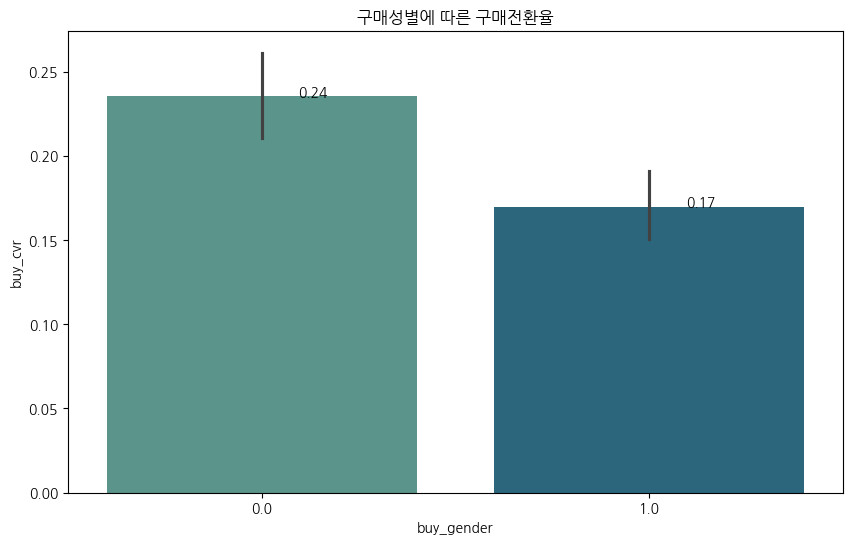

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='buy_gender', y='buy_cvr', data=df, palette='crest')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 1.5, # x 좌표
            p.get_y() + p.get_height() , # y 좌표
            f"{p.get_height():.2f}", # 값
            ha='center') # 가운데 정렬
plt.title("구매성별에 따른 구매전환율")
plt.show()

- 남성의 구매전환율이 여성의 구매전환율보다 0.07% 정도 더 높다.
- 여성이 남성보다 실제 구매를 하기까지 시간 또는 더 많은 상품을 둘러본다고 볼 수 있다.

<ipython-input-252-73cc81dc0d98>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




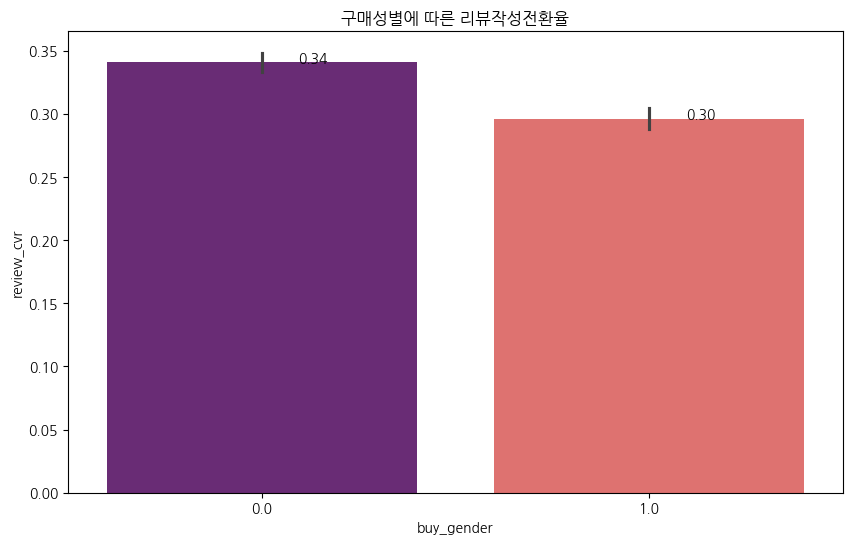

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='buy_gender', y='review_cvr', data=df, palette='magma')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 1.5, # x 좌표
            p.get_y() + p.get_height() , # y 좌표
            f"{p.get_height():.2f}", # 값
            ha='center') # 가운데 정렬
plt.title("구매성별에 따른 리뷰작성전환율")
plt.show()

- 남성의 리뷰작성전환율이 여성의 리뷰작성전환율보다 0.04% 더 높다.
- 남성이 여성의 경우보다 리뷰 작성에 좀 더 긍정적이거나 아주 조금 더 성실하다고 볼 수 있다.

<ipython-input-253-b7e41f5857dd>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




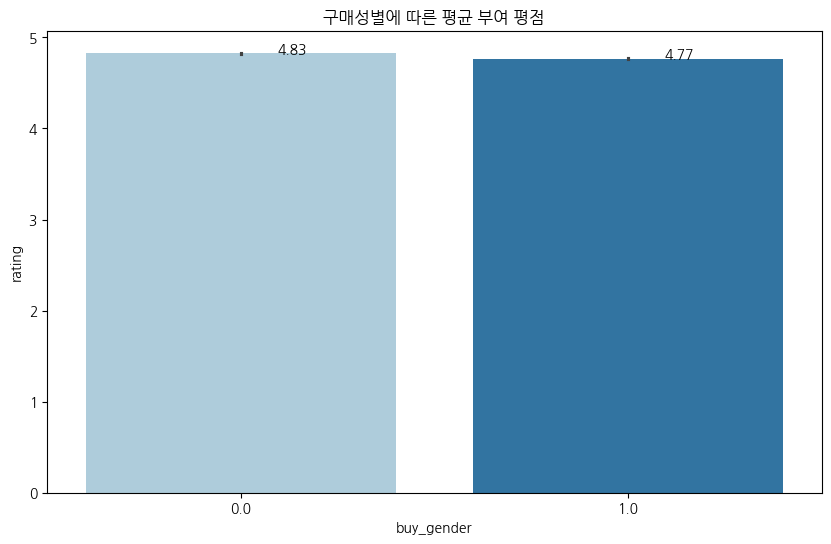

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='buy_gender', y='rating', data=df, palette='Paired')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 1.5, # x 좌표
            p.get_y() + p.get_height() , # y 좌표
            f"{p.get_height():.2f}", # 값
            ha='center') # 가운데 정렬
plt.title("구매성별에 따른 평균 부여 평점")
plt.show()

- 남녀 모두 구매한 상품에 대한 평균 만족도는 4.7점 이상으로, 높은 만족을 하고 있음을 알 수 있다.

<ipython-input-254-c73fe2eb9295>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




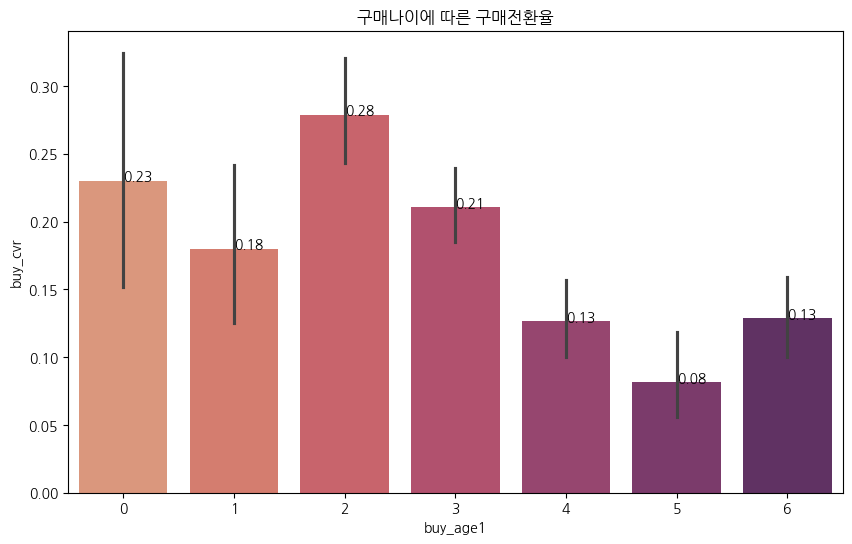

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='buy_age1', y='buy_cvr', data=df, palette='flare')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 1.5, # x 좌표
            p.get_y() + p.get_height() , # y 좌표
            f"{p.get_height():.2f}", # 값
            ha='center') # 가운데 정렬
plt.title("구매나이에 따른 구매전환율")
plt.show()

- 구매 전환율을 10대 후반에서 20대 초반이 가장 높고, 이후로 점점 떨어지다가 40세 이상에서 다시 상승하는 양상을 보인다.
- 40세 이상의 경우, 쇼핑몰의 이미지와 특성 상 부모님의 계정을 이용한 자녀일 가능성이 있기 때문에 10대로 해석할 수 있는 여지가 있다.

<ipython-input-255-a25b303252fd>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




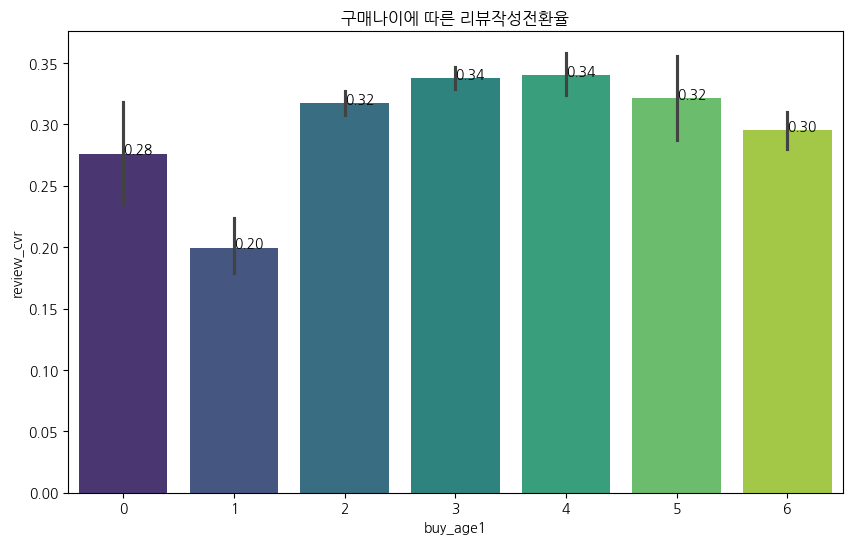

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='buy_age1', y='review_cvr', data=df, palette='viridis')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 1.5, # x 좌표
            p.get_y() + p.get_height() , # y 좌표
            f"{p.get_height():.2f}", # 값
            ha='center') # 가운데 정렬
plt.title("구매나이에 따른 리뷰작성전환율")
plt.show()

- 재미있는 사실은 구매 나이에 따른 리뷰작성전환율은 구매 나이에 따른 구매전환율과 다소 상반되는 그래프를 그린다는 것이다.
- 리뷰 작성은 10대를 제외하고 대부분 비슷한 것을 확인하였다.

In [ ]:
df[df['buy']<10000].shape

(4801, 21)

In [ ]:
fig = px.histogram(df[df['buy']<10000], x='buy', nbins=10)
fig.show()